<a href="https://colab.research.google.com/github/rifatonurakdogan/Children-vs-Adult-Classification/blob/main/notebook9cf0684a81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


File count: 340
Sample adult image:


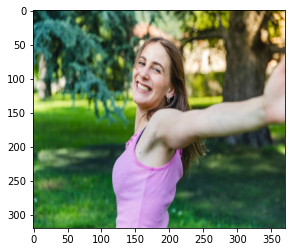


Sample children image:


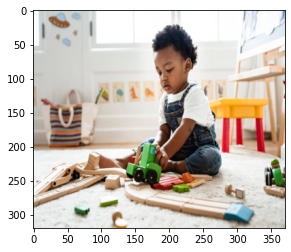

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
#Get images from the directory
base_dir = "/content/drive/MyDrive/Colab Notebooks/dataset"
adults_train_dir = os.path.join(base_dir,"train/adults")
adults_test_dir = os.path.join(base_dir,"test/adults")
children_train_dir = os.path.join(base_dir,"train/children")
children_test_dir = os.path.join(base_dir,"test/children")
#Will be used for ImageDataGenerator below
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")
count = 0
for path in os.listdir(children_train_dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(children_train_dir, path)):
        count += 1
print('File count:', count)
print("Sample adult image:")
plt.imshow(load_img(f"{os.path.join(adults_train_dir, os.listdir(adults_train_dir)[0])}"))
plt.show()

print("\nSample children image:")
plt.imshow(load_img(f"{os.path.join(children_train_dir, os.listdir(children_train_dir)[0])}"))
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
#Load the first example of the adult images
sample_image  = load_img(f"{os.path.join(adults_train_dir, os.listdir(adults_train_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (320, 370, 3)
The maximum pixel value used is: 255.0


In [ ]:
#Callback function to stop training if it approximates to 1
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                        target_size = (240,240),
                                                        batch_size = 34,
                                                        class_mode = "binary")
    test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                      target_size = (240,240),
                                                      batch_size = 6,
                                                      class_mode = "binary")
    return train_generator, test_generator

In [ ]:
train_gen,test_gen = image_generator()

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras import optimizers, losses
def train_model(train_generator,test_generator):
    #Instantiate the callback
    callbacks = myCallback()
  
    model= tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.RMSprop(learning_rate=0.0001),
                  metrics=['accuracy'])
    history = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=20,
      verbose=1,
      validation_data = test_generator,
      validation_steps=20,
      callbacks=[callbacks])
    print(model.summary())
    return history,model

In [ ]:
with tf.device('/device:GPU:0'):
  hist,model = train_model(train_gen,test_gen)

Epoch 1/20
20/20 [==============================] - 5s 187ms/step - loss: 0.6955 - accuracy: 0.4779 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 2/20
20/20 [==============================] - 4s 175ms/step - loss: 0.6804 - accuracy: 0.5853 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 3/20
20/20 [==============================] - 4s 176ms/step - loss: 0.6708 - accuracy: 0.5529 - val_loss: 0.6501 - val_accuracy: 0.6333
Epoch 4/20
20/20 [==============================] - 3s 173ms/step - loss: 0.6578 - accuracy: 0.6206 - val_loss: 0.6330 - val_accuracy: 0.6333
Epoch 5/20
20/20 [==============================] - 4s 175ms/step - loss: 0.6477 - accuracy: 0.6191 - val_loss: 0.6286 - val_accuracy: 0.6417
Epoch 6/20
20/20 [==============================] - 4s 177ms/step - loss: 0.6384 - accuracy: 0.6265 - val_loss: 0.6326 - val_accuracy: 0.6167
Epoch 7/20
20/20 [==============================] - 4s 177ms/step - loss: 0.6300 - accuracy: 0.6441 - val_loss: 0.6256 - val_accuracy: 0.6333
Epoch 

In [ ]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 20 epochs


Saving child.jpg to child (5).jpg
[0.828701]
child.jpg is a child


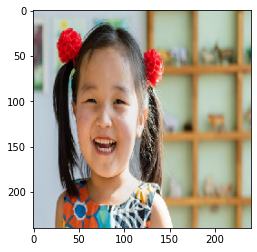

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(240, 240))
  plt.imshow(img)
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a child")
  else:
    print(fn + " is a adult")
 